In [1]:
import sys
import datetime
import pandas as pd

path_root = '../../..'
sys.path.append(f'{path_root}/')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = 'lombardia'

path_data = f'{path_root}/data'
path_img_root =  f'{path_data}/imgs/grafici/{level}/{region_name}'
path_csv = f'{path_data}/csv'
csv_in_name = f'{path_csv}/{level}/covid19-{region_name}.csv'

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,3,Lombardia,79,25,104,127,231,65,68,...,3.0,2237.0,0.0,56.0,24.04,45.02,3.04,0.00,31.58,39.16
1,2020-02-26T18:00:00,3,Lombardia,79,25,104,145,249,18,18,...,0.0,-492.0,0.0,18.0,24.04,41.77,-3.66,0.00,0.00,7.79
2,2020-02-27T18:00:00,3,Lombardia,172,41,213,136,349,100,145,...,5.0,112.0,0.0,-9.0,19.25,61.03,129.46,0.00,64.00,40.16
3,2020-02-28T18:00:00,3,Lombardia,235,47,282,192,474,125,128,...,3.0,1515.0,0.0,56.0,16.67,59.49,8.45,0.00,14.63,35.82
4,2020-02-29T17:00:00,3,Lombardia,256,80,336,216,552,78,84,...,6.0,888.0,0.0,24.0,23.81,60.87,9.46,0.00,70.21,16.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2021-03-21T17:00:00,3,Lombardia,6926,806,7732,98043,105775,1324,4003,...,90.0,46150.0,12632.0,1274.0,10.42,7.31,8.67,31.69,1.90,1.27
391,2021-03-22T17:00:00,3,Lombardia,6952,822,7774,90789,98563,-7212,2105,...,77.0,21732.0,6722.0,-7254.0,10.57,7.89,9.69,31.32,1.99,-6.82
392,2021-03-23T17:00:00,3,Lombardia,7165,836,8001,90255,98256,-307,3643,...,99.0,47175.0,11422.0,-534.0,10.45,8.14,7.72,31.89,1.70,-0.31
393,2021-03-24T17:00:00,3,Lombardia,7178,845,8023,92149,100172,1916,4282,...,110.0,59626.0,13089.0,1894.0,10.53,8.01,7.18,32.71,1.08,1.95


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 3, 25, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 5046
Nuovi tamponi: 59696.0
Percentuale nuovi positivi/nuovi tamponi: 8.5 %
Nuovi guariti: 3040.0
Nuovi deceduti: 100.0
Variazione positivi ricoverati con sintomi: -46.0
Variazione positivi in terapia intensiva: 0.0
Variazione positivi in isolamento dimiciliare: 1952.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 3, 25, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-01-24T17:00:00,3,Lombardia,3428,405,3833,49171,53004,536,1375,...,44.0,23182.0,6530.0,600.0,10.57,7.23,5.93,21.06,1.76,1.02
1,2021-01-25T17:00:00,3,Lombardia,3412,407,3819,46158,49977,-3027,1484,...,46.0,18777.0,6287.0,-3013.0,10.66,7.64,7.90,23.60,0.49,-5.71
2,2021-01-26T17:00:00,3,Lombardia,3530,392,3922,45046,48968,-1009,1230,...,77.0,24040.0,4376.0,-1112.0,9.99,8.01,5.12,28.11,-3.69,-2.02
3,2021-01-27T17:00:00,3,Lombardia,3573,377,3950,45088,49038,70,2293,...,62.0,44809.0,9661.0,42.0,9.54,8.05,5.12,23.73,-3.83,0.14
4,2021-01-28T17:00:00,3,Lombardia,3537,371,3908,45931,49839,801,2603,...,88.0,41677.0,10916.0,843.0,9.49,7.84,6.25,23.85,-1.59,1.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-03-21T17:00:00,3,Lombardia,6926,806,7732,98043,105775,1324,4003,...,90.0,46150.0,12632.0,1274.0,10.42,7.31,8.67,31.69,1.90,1.27
57,2021-03-22T17:00:00,3,Lombardia,6952,822,7774,90789,98563,-7212,2105,...,77.0,21732.0,6722.0,-7254.0,10.57,7.89,9.69,31.32,1.99,-6.82
58,2021-03-23T17:00:00,3,Lombardia,7165,836,8001,90255,98256,-307,3643,...,99.0,47175.0,11422.0,-534.0,10.45,8.14,7.72,31.89,1.70,-0.31
59,2021-03-24T17:00:00,3,Lombardia,7178,845,8023,92149,100172,1916,4282,...,110.0,59626.0,13089.0,1894.0,10.53,8.01,7.18,32.71,1.08,1.95


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

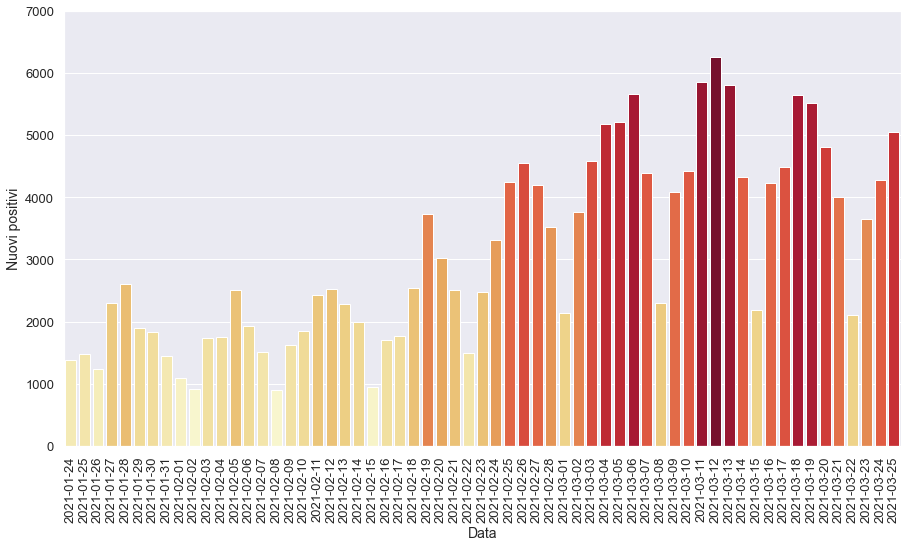

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

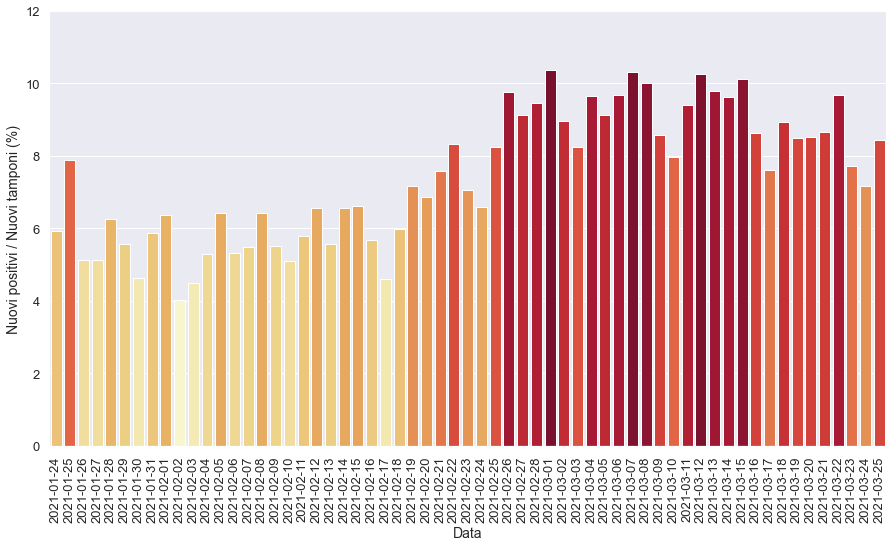

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

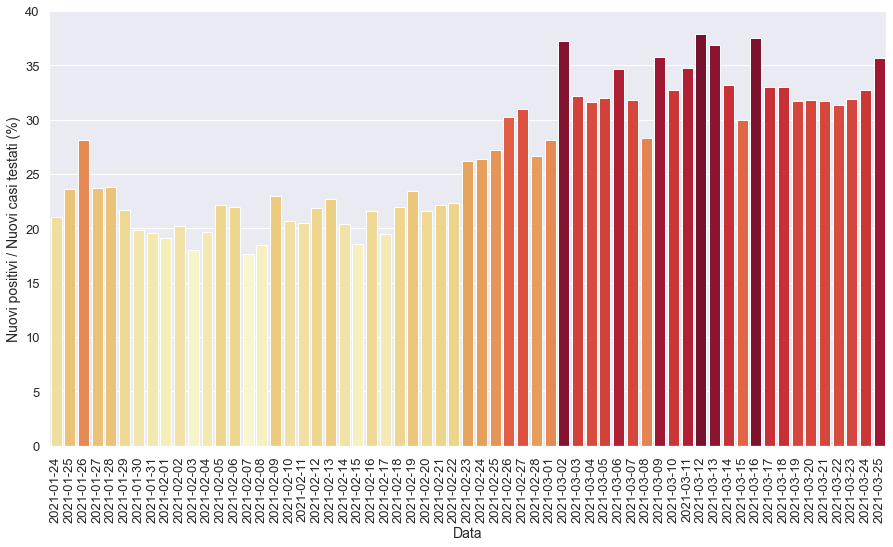

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

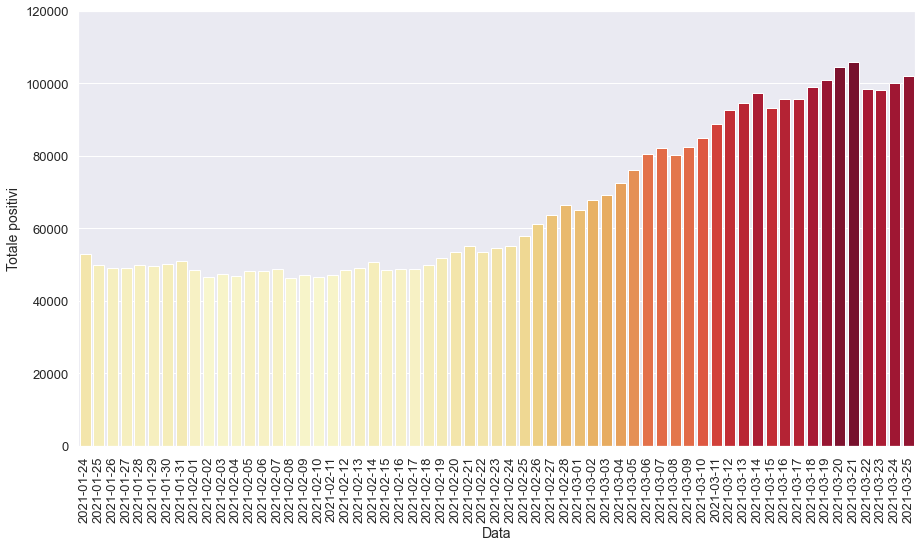

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

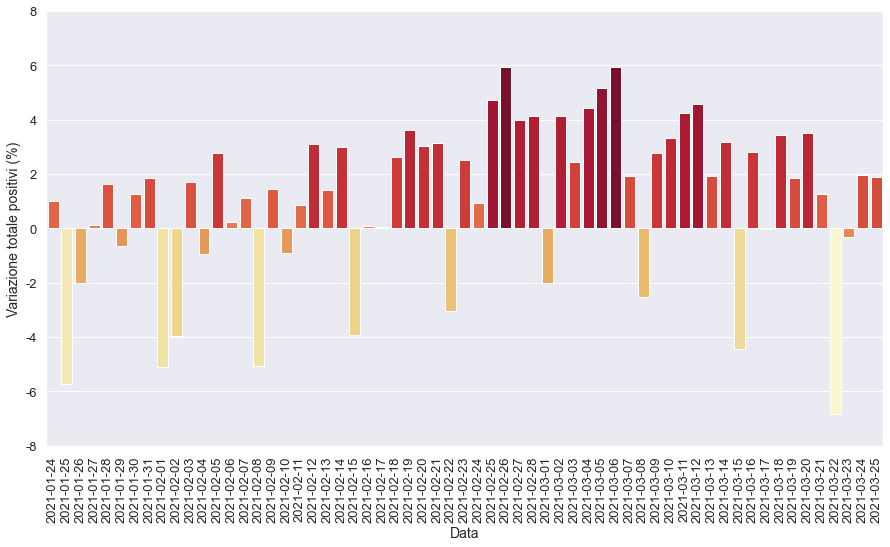

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

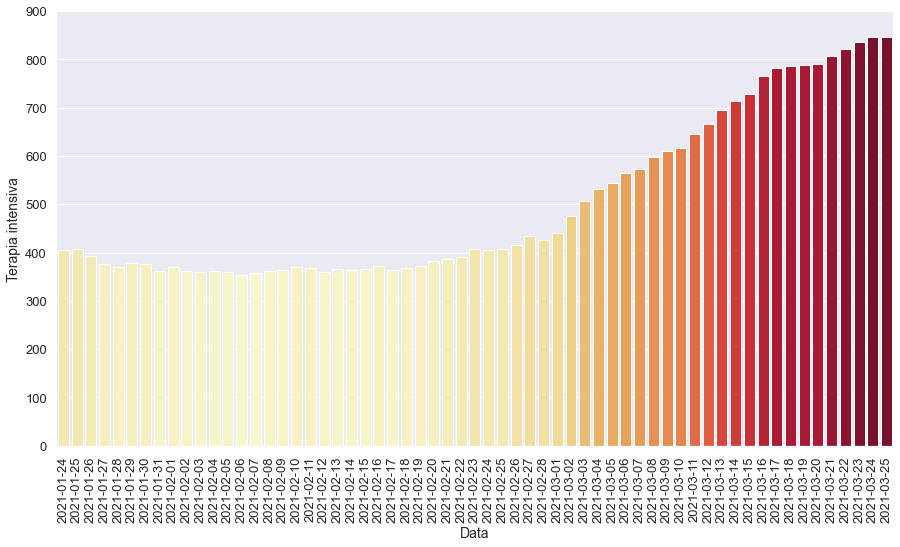

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

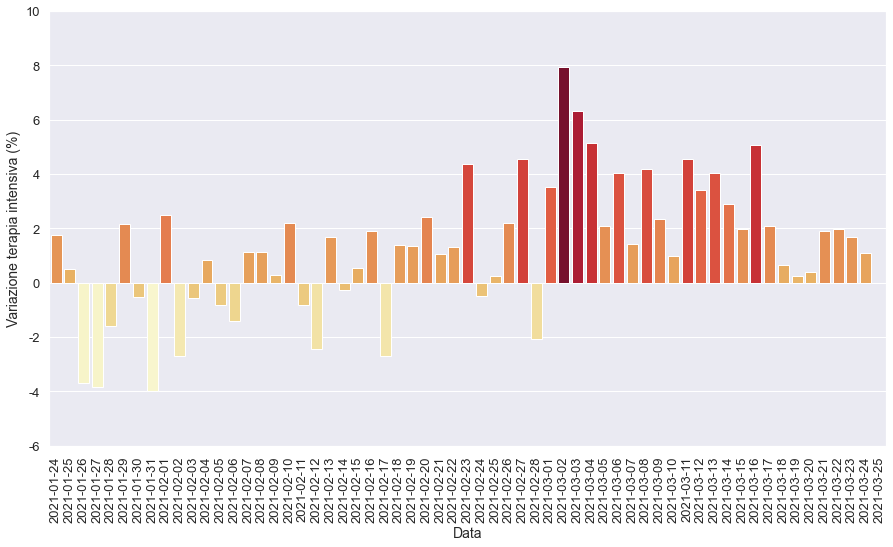

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

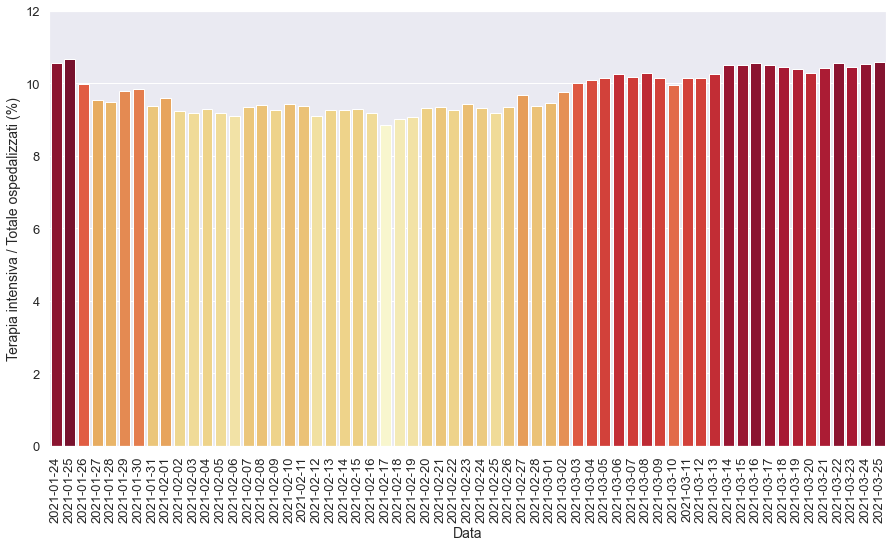

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

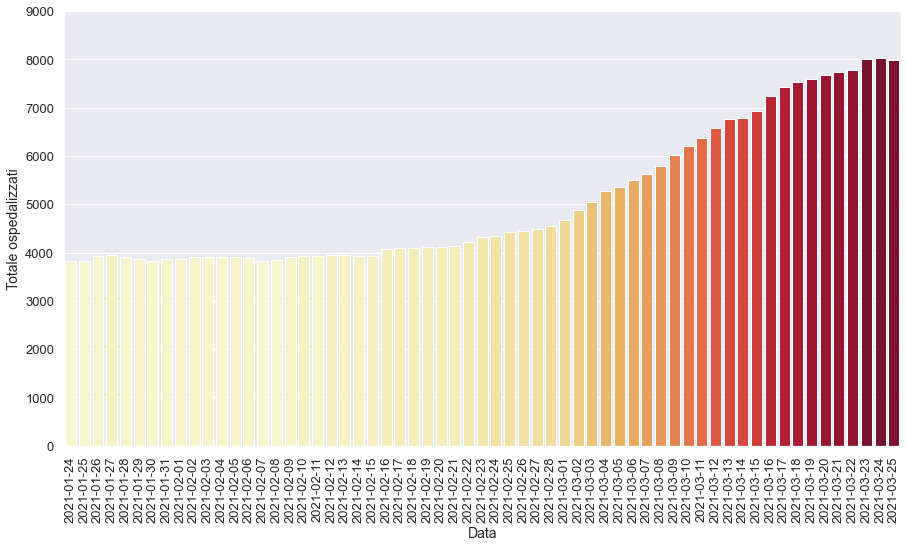

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

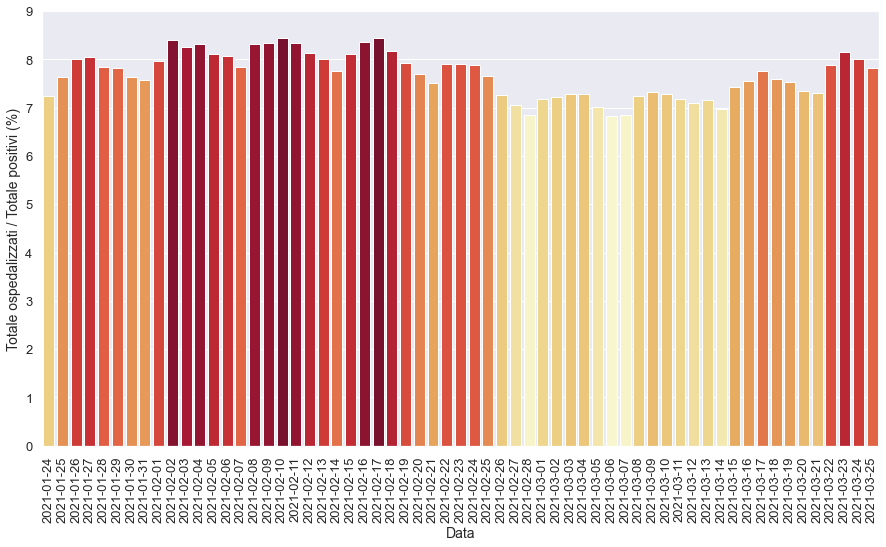

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

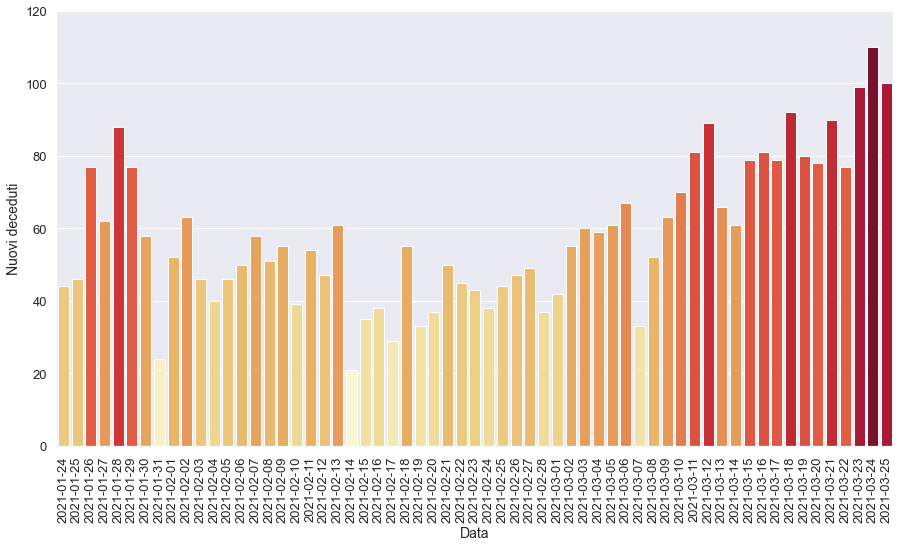

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

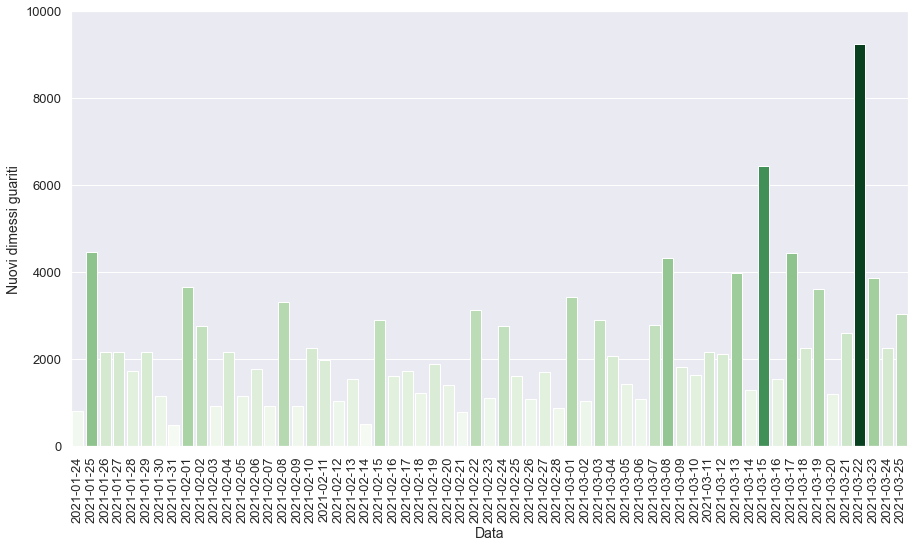

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-02-23T17:00:00,3,Lombardia,3917,408,4325,50390,54715,1346,2480,...,43.0,35149.0,9478.0,1238.0,9.43,7.90,7.06,26.17,4.35,2.52
1,2021-02-24T17:00:00,3,Lombardia,3946,406,4352,50873,55225,510,3310,...,38.0,50268.0,12549.0,483.0,9.33,7.88,6.58,26.38,-0.49,0.93
2,2021-02-25T17:00:00,3,Lombardia,4024,407,4431,53397,57828,2603,4243,...,44.0,51473.0,15576.0,2524.0,9.19,7.66,8.24,27.24,0.25,4.71
3,2021-02-26T17:00:00,3,Lombardia,4034,416,4450,56817,61267,3439,4557,...,47.0,46725.0,15061.0,3420.0,9.35,7.26,9.75,30.26,2.21,5.95
4,2021-02-27T17:00:00,3,Lombardia,4062,435,4497,59217,63714,2447,4191,...,49.0,45865.0,13513.0,2400.0,9.67,7.06,9.14,31.01,4.57,3.99
5,2021-02-28T17:00:00,3,Lombardia,4118,426,4544,61797,66341,2627,3529,...,37.0,37251.0,13253.0,2580.0,9.38,6.85,9.47,26.63,-2.07,4.12
6,2021-03-01T17:00:00,3,Lombardia,4224,441,4665,60337,65002,-1339,2135,...,42.0,20571.0,7581.0,-1460.0,9.45,7.18,10.38,28.16,3.52,-2.02
7,2021-03-02T17:00:00,3,Lombardia,4408,476,4884,62806,67690,2688,3762,...,55.0,42052.0,10113.0,2469.0,9.75,7.22,8.95,37.20,7.94,4.14
8,2021-03-03T17:00:00,3,Lombardia,4545,506,5051,64285,69336,1646,4590,...,60.0,55611.0,14251.0,1479.0,10.02,7.28,8.25,32.21,6.30,2.43
9,2021-03-04T17:00:00,3,Lombardia,4735,532,5267,67127,72394,3058,5174,...,59.0,53563.0,16372.0,2842.0,10.10,7.28,9.66,31.60,5.14,4.41


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

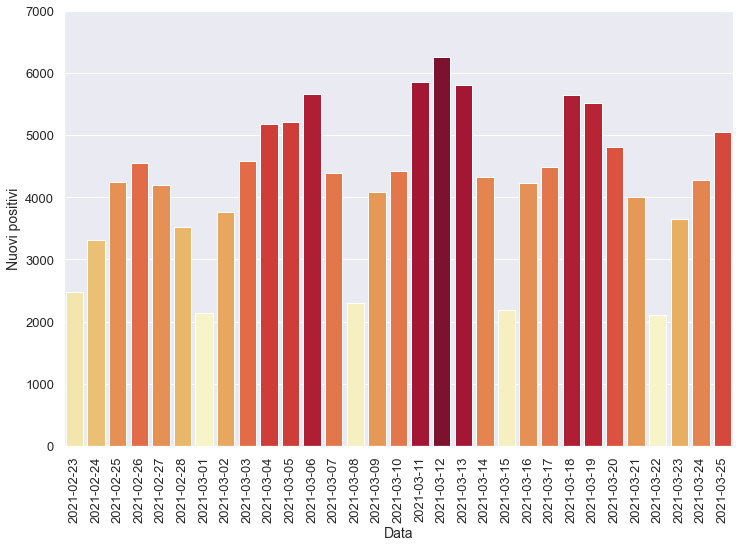

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

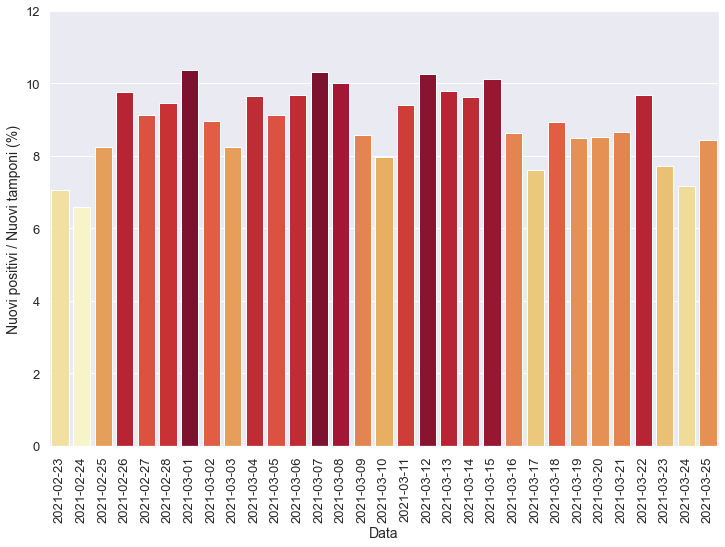

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

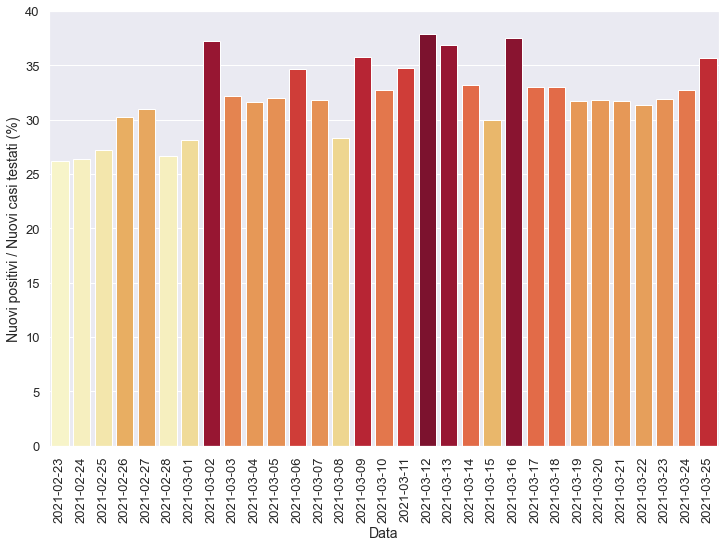

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

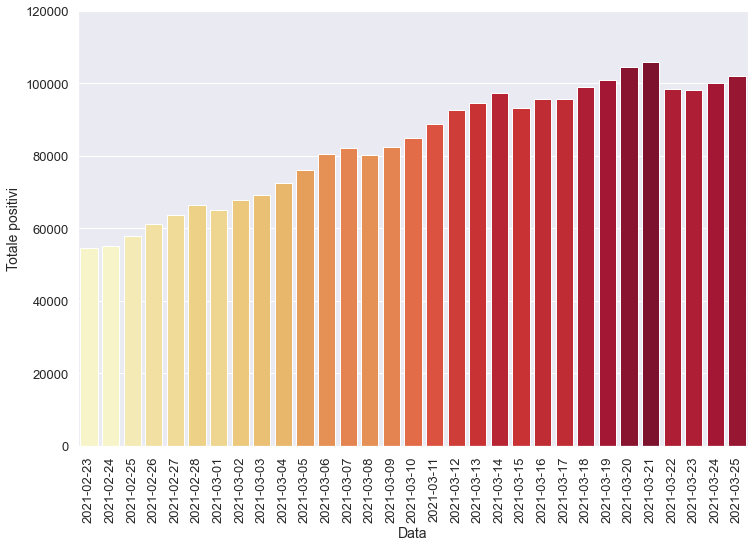

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

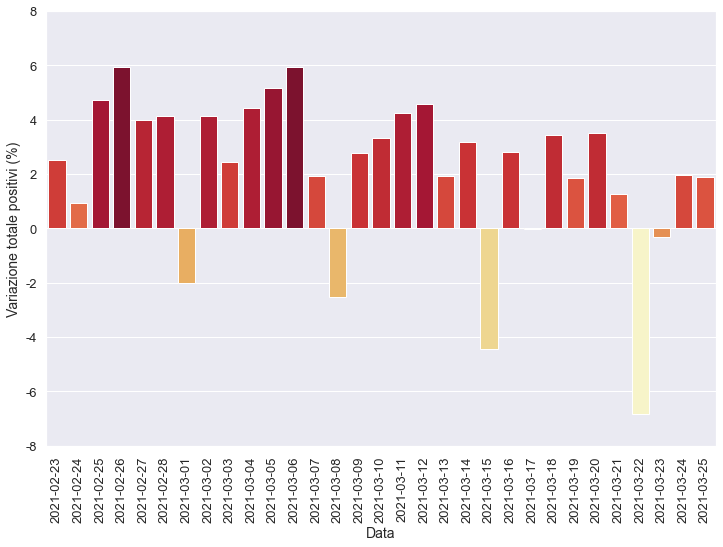

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

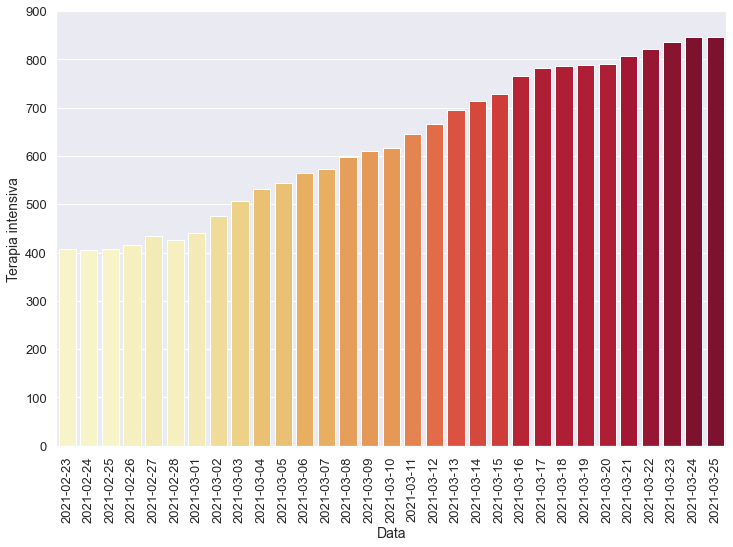

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

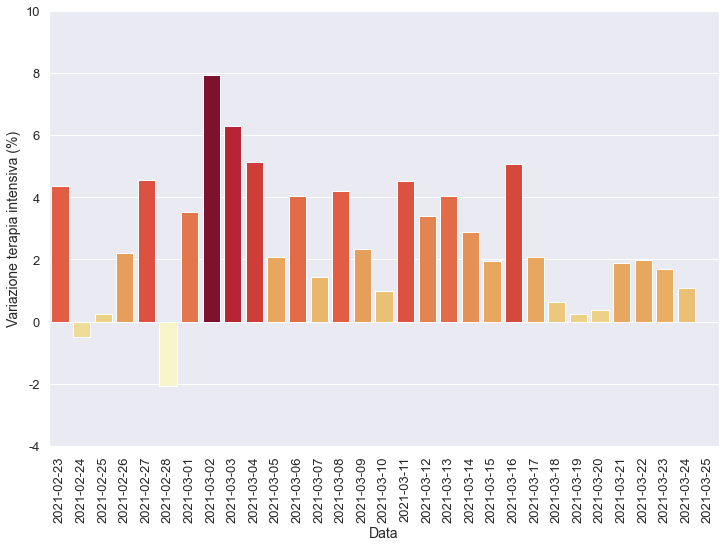

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

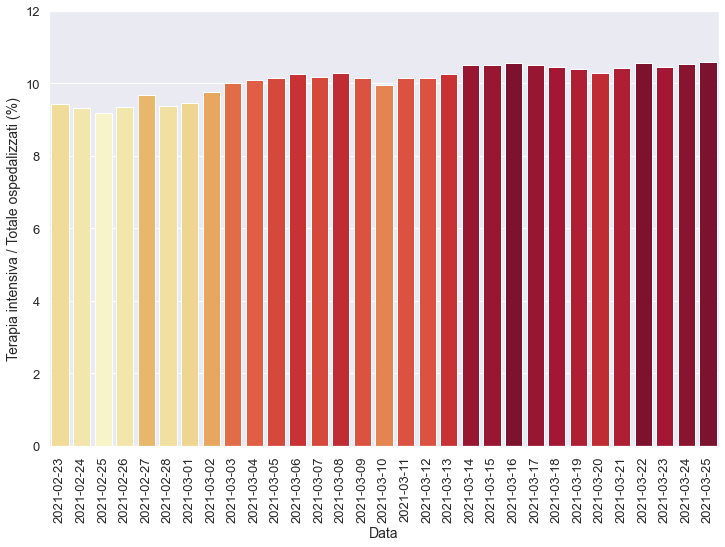

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

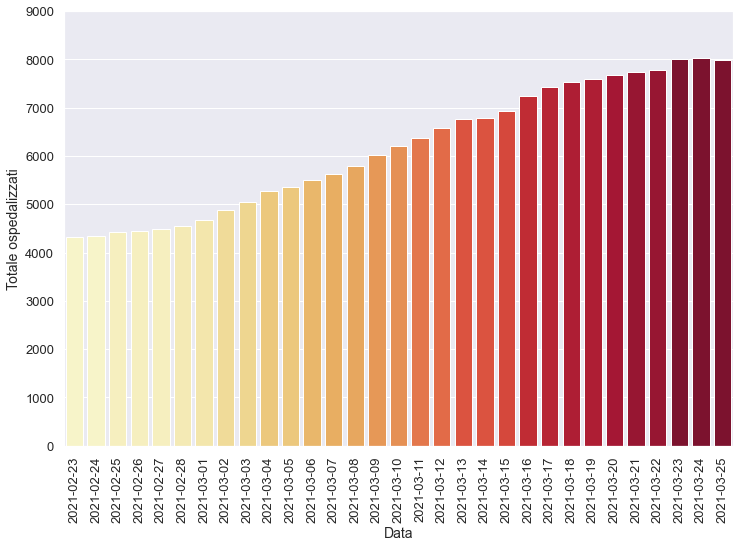

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

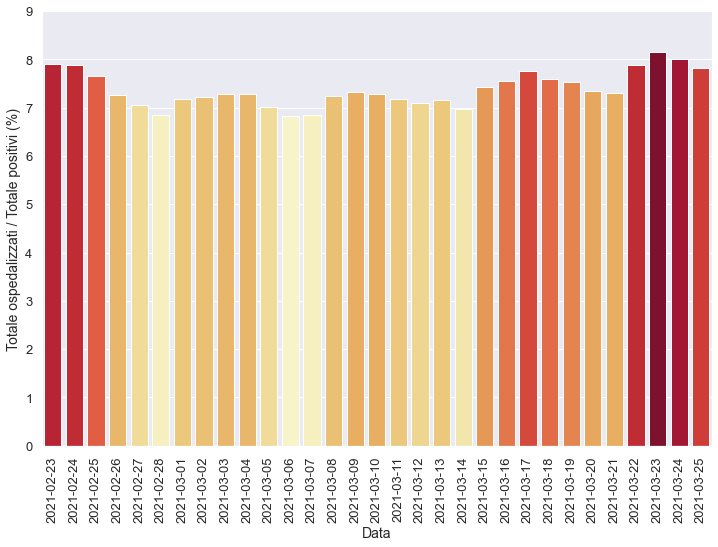

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

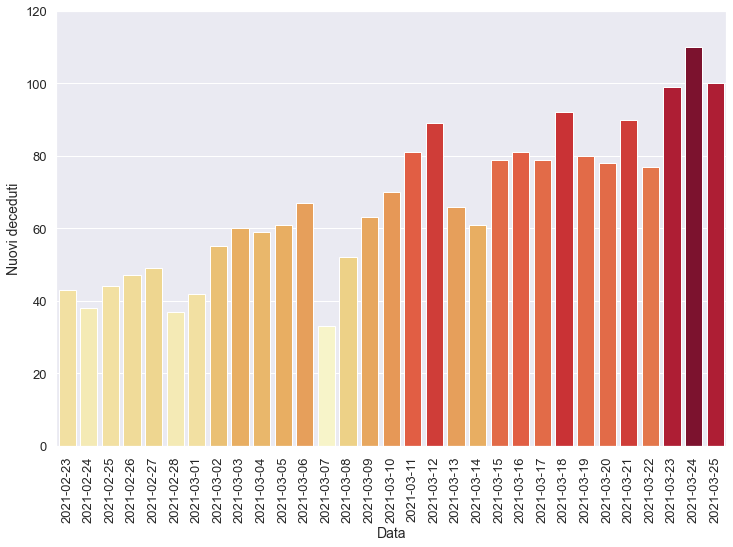

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

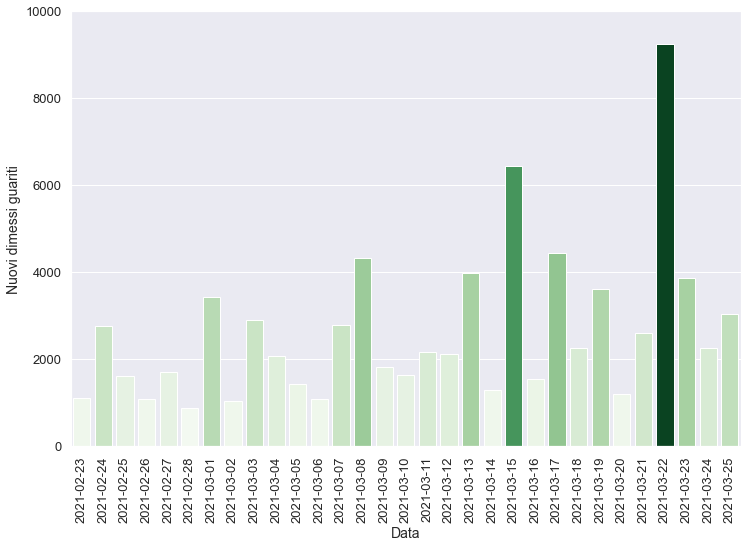

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-03-18T17:00:00,3,Lombardia,6744,786,7530,91539,99069,3304,5641,...,92.0,63197.0,17078.0,3196.0,10.44,7.60,8.93,33.03,0.64,3.45
1,2021-03-19T17:00:00,3,Lombardia,6796,788,7584,93320,100904,1835,5518,...,80.0,64999.0,17422.0,1781.0,10.39,7.52,8.49,31.67,0.25,1.85
2,2021-03-20T17:00:00,3,Lombardia,6891,791,7682,96769,104451,3547,4810,...,78.0,56383.0,15142.0,3449.0,10.30,7.35,8.53,31.77,0.38,3.52
3,2021-03-21T17:00:00,3,Lombardia,6926,806,7732,98043,105775,1324,4003,...,90.0,46150.0,12632.0,1274.0,10.42,7.31,8.67,31.69,1.90,1.27
4,2021-03-22T17:00:00,3,Lombardia,6952,822,7774,90789,98563,-7212,2105,...,77.0,21732.0,6722.0,-7254.0,10.57,7.89,9.69,31.32,1.99,-6.82
5,2021-03-23T17:00:00,3,Lombardia,7165,836,8001,90255,98256,-307,3643,...,99.0,47175.0,11422.0,-534.0,10.45,8.14,7.72,31.89,1.70,-0.31
6,2021-03-24T17:00:00,3,Lombardia,7178,845,8023,92149,100172,1916,4282,...,110.0,59626.0,13089.0,1894.0,10.53,8.01,7.18,32.71,1.08,1.95
7,2021-03-25T17:00:00,3,Lombardia,7132,845,7977,94101,102078,1906,5046,...,100.0,59696.0,14147.0,1952.0,10.59,7.81,8.45,35.67,0.00,1.90


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

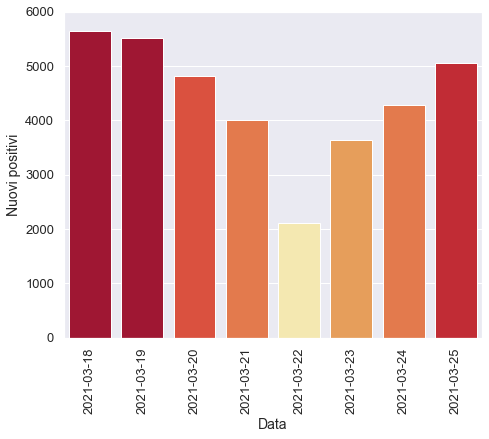

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

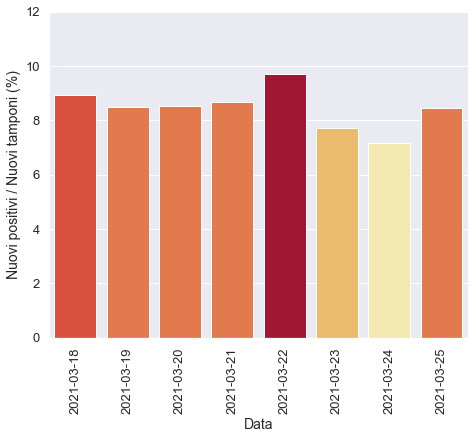

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

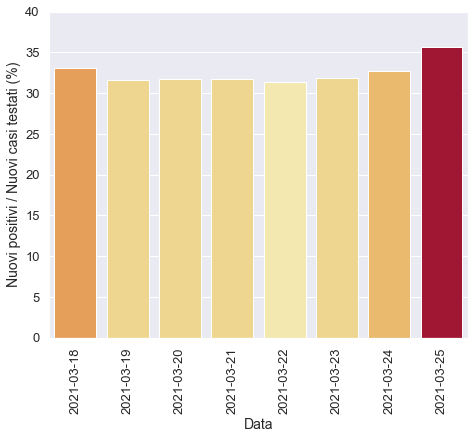

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

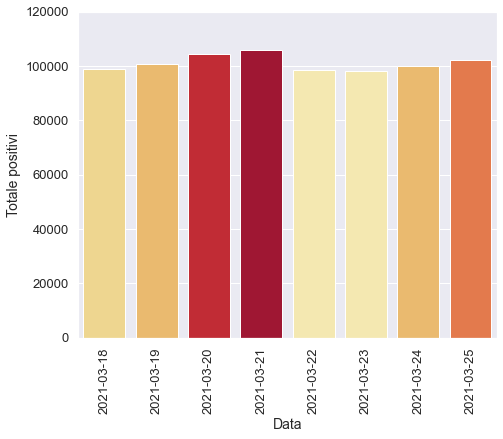

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

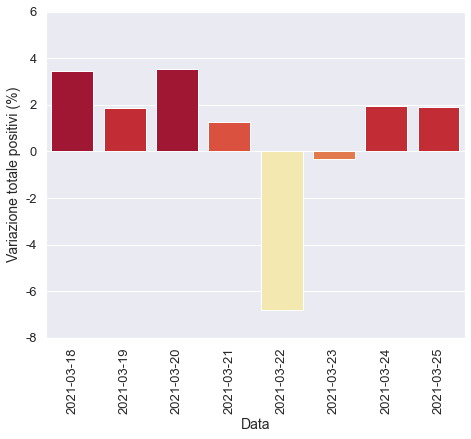

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

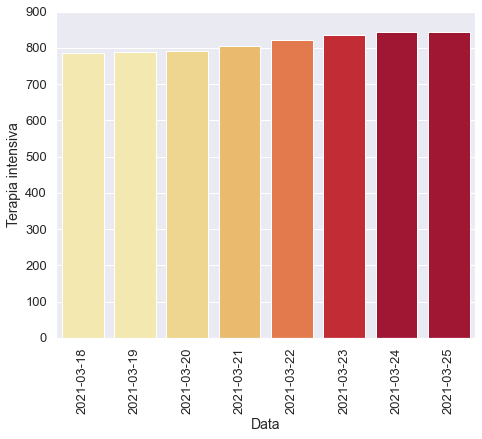

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

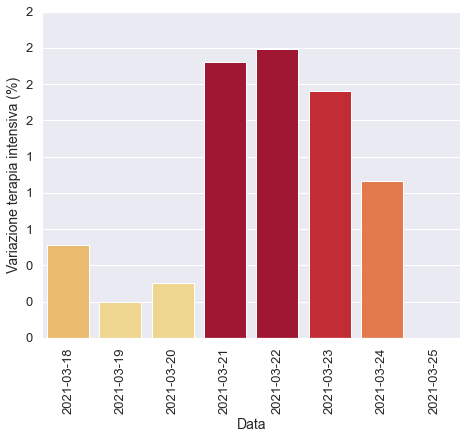

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

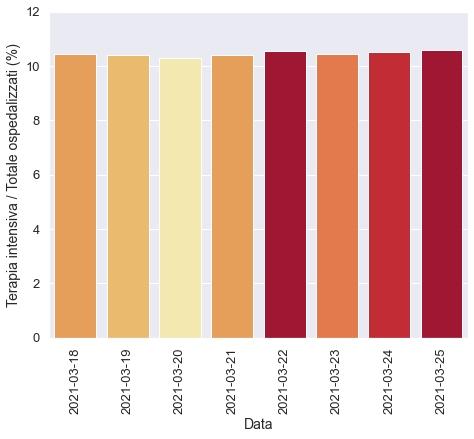

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

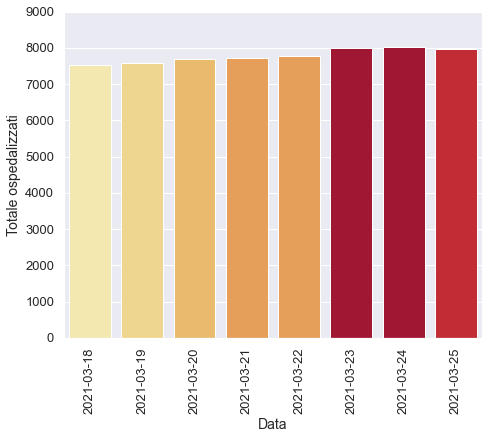

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

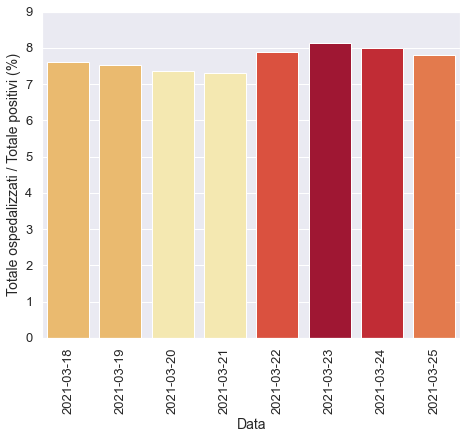

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

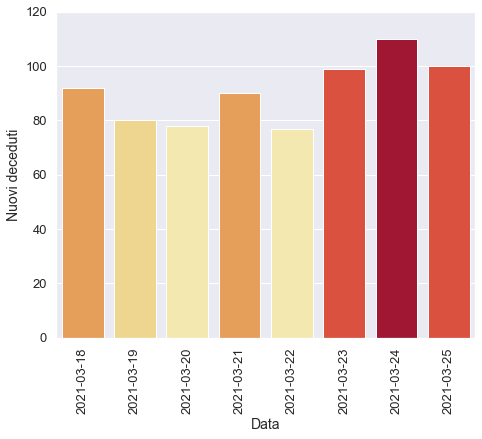

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

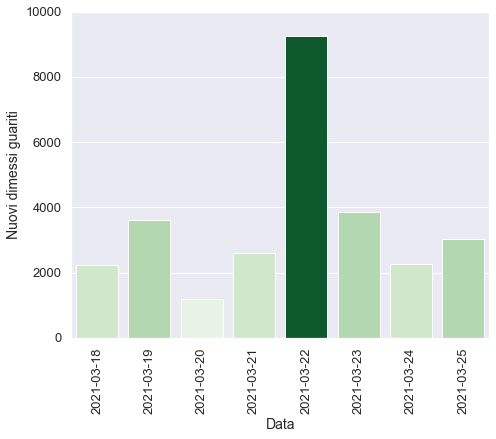

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)